In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'/Users/sukanto/Google Drive/allprojects/393_43835_bundle_archive'

# Reading in Data and Preprocessing

## Listings Data

In [3]:
df = pd.read_csv('calendar.csv') #reading in first csv file of calendar
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df.isnull().any() #checking for missing values in columns

listing_id    False
date          False
available     False
price          True
dtype: bool

In [5]:
df['price'].isna().sum() #checking for total missing values

459028

In [6]:
df.shape #looking at data dimensions

(1393570, 4)

In [7]:
df['price'].describe() #looking at summary stats of price column

count      934542
unique        669
top       $150.00
freq        36646
Name: price, dtype: object

In [8]:
df['price'] = df['price'].str.replace("[$,]", "").astype("float") #convert price data points to float

In [9]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
df_price = df.fillna(df['price'].median()) #imputing missing values in price with median values
df_price.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,109.0
3,241032,2016-01-07,f,109.0
4,241032,2016-01-08,f,109.0


In [11]:
df_price['price'].median() #middle point of price

109.0

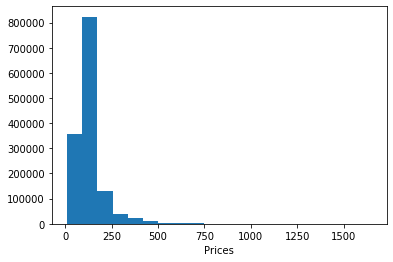

In [13]:
plt.hist(df_price['price'],bins=20)
plt.xlabel('Prices'); #most prices stay within the $250 range

In [14]:
df_p = df_price[df_price['available']!='f']
df_p.drop(['listing_id'],axis=1,inplace=True)
df_p

/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,available,price
0,2016-01-04,t,85.0
1,2016-01-05,t,85.0
9,2016-01-13,t,85.0
10,2016-01-14,t,85.0
14,2016-01-18,t,85.0
...,...,...,...
1393207,2016-01-06,t,87.0
1393208,2016-01-07,t,87.0
1393211,2016-01-10,t,87.0
1393212,2016-01-11,t,87.0


In [15]:
df_p_1 = df_p[['date','price']]
df_p_1

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0
...,...,...
1393207,2016-01-06,87.0
1393208,2016-01-07,87.0
1393211,2016-01-10,87.0
1393212,2016-01-11,87.0


In [16]:
df_p_1.to_csv('prices.csv')

In [85]:
points = df_p_1[['date','price']].head(500)
points

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0
...,...,...
588,2016-08-14,206.0
589,2016-08-15,187.0
590,2016-08-16,185.0
591,2016-08-17,189.0


In [86]:
points.columns

Index(['date', 'price'], dtype='object')

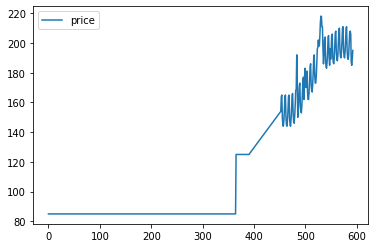

In [89]:
points.plot()
plt.savefig('date_price.jpg');

## Listings Data

In [16]:
df1 = pd.read_csv('listings.csv') #reading in listings dataframe
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [17]:
df.shape

(1393570, 4)

In [18]:
df1.columns #looking at dataframe columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [19]:
df1.drop(['listing_url','scrape_id','notes','jurisdiction_names','thumbnail_url','medium_url'],axis=1,inplace=True)

In [20]:
df1.isnull().any() #checking for missing values

id                                  False
last_scraped                        False
name                                False
summary                              True
space                                True
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                    True
Length: 86, dtype: bool

In [21]:
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(df1['reviews_per_month'].median()) #filling missing values in reviews per month with median
df1.head()

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,picture_url,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,...,9.0,10.0,f,NaN,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,f,NaN,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,...,10.0,10.0,f,NaN,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,...,NaN,NaN,f,NaN,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,https://a1.muscache.com/ac/pictures/6120468/b0...,...,9.0,9.0,f,NaN,f,strict,f,f,1,0.89


In [22]:
can = df1.cancellation_policy.value_counts() #how many listings have strict cancellation policies?
can

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [23]:
print("Of the listings, {:.2f}% have strict cancellation policies".format((1417/sum(can))*100))

Of the listings, 37.11% have strict cancellation policies


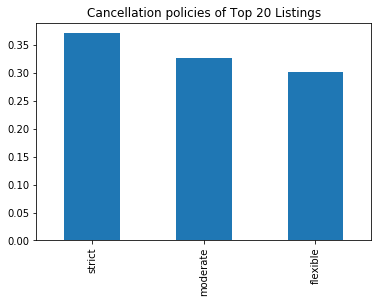

In [24]:
(can[:20]/df1.shape[0]).plot(kind='bar');
plt.title("Cancellation policies of Top 20 Listings"); #looks like most listings have strict cancellation policies

In [25]:
plt.savefig('cancellations.jpg');

<Figure size 432x288 with 0 Axes>

In [26]:
df1.isnull().any()

id                                  False
last_scraped                        False
name                                False
summary                              True
space                                True
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                   False
Length: 86, dtype: bool

In [27]:
df1['reviews_per_month'].describe() #summary stats for reviews per month

count    3818.000000
mean        1.990416
std         1.677888
min         0.020000
25%         0.830000
50%         1.540000
75%         2.660000
max        12.150000
Name: reviews_per_month, dtype: float64

In [28]:
rev = df1['reviews_per_month'].value_counts() #chunk of listings receive around 2-3 reviews per month
rev

1.54    637
1.00     70
2.00     45
0.23     24
0.36     21
       ... 
8.18      1
3.71      1
4.72      1
7.53      1
6.14      1
Name: reviews_per_month, Length: 654, dtype: int64

In [29]:
df1['reviews_per_month'].describe() #one listing received 12 reviews a month! must be very popular

count    3818.000000
mean        1.990416
std         1.677888
min         0.020000
25%         0.830000
50%         1.540000
75%         2.660000
max        12.150000
Name: reviews_per_month, dtype: float64

In [30]:
df1.drop(['license'],axis=1,inplace=True) #license columns seems to have only NaN values, thus dropping

In [31]:
df1.head()

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,https://a1.muscache.com/ac/pictures/6120468/b0...,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [32]:
df1.rename(columns={'neighborhood_overview':'neighborhood'}) #renaming a column

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood,transit,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,https://a1.muscache.com/ac/pictures/6120468/b0...,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,https://a2.muscache.com/ac/pictures/103217071/...,...,8.0,10.0,8.0,f,f,strict,f,f,8,0.30
3814,8902327,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,Uber and Car2go are good options in Seattle. T...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,2.00
3815,10267360,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,https://a2.muscache.com/ac/pictures/a5974f04-2...,...,NaN,NaN,NaN,f,f,moderate,f,f,1,1.54
3816,9604740,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,Yes,https://a2.muscache.com/ac/pictures/202e4ad6-b...,...,NaN,NaN,NaN,f,f,moderate,f,f,1,1.54


In [33]:
df1.drop(['experiences_offered','picture_url'],axis=1,inplace=True) #dropping some more irrelevant columns      

In [34]:
df1.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,xl_picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,5177328,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,NaN,16708587,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,NaN,1452570,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [35]:
df1.drop(['xl_picture_url'],axis=1,inplace=True) #and some more

In [36]:
df1.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,956883,https://www.airbnb.com/users/show/956883,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",5177328,https://www.airbnb.com/users/show/5177328,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,16708587,https://www.airbnb.com/users/show/16708587,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,9851441,https://www.airbnb.com/users/show/9851441,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,1452570,https://www.airbnb.com/users/show/1452570,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [37]:
df1.drop(['host_id','host_url'],axis=1,inplace=True)

In [39]:
df1.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,Maija,2011-08-11,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",Andrea,2013-02-21,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,Jill,2014-06-12,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,Emily,2013-11-06,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,Emily,2011-11-29,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [40]:
df1.to_csv('clean_listings.csv')

In [38]:
df1['instant_bookable'].value_counts() #most listings are not bookable instantly

f    3227
t     591
Name: instant_bookable, dtype: int64

In [39]:
df1['neighborhood_overview']

0                                                     NaN
1       Queen Anne is a wonderful, truly functional vi...
2       Upper Queen Anne is a charming neighborhood fu...
3                                                     NaN
4       We are in the beautiful neighborhood of Queen ...
                              ...                        
3813    We're located near lots of family fun. Woodlan...
3814    The neighborhood is a quiet oasis that is clos...
3815                                                  NaN
3816    Madison Park offers a peaceful slow pace upsca...
3817                                                  NaN
Name: neighborhood_overview, Length: 3818, dtype: object

In [40]:
df1.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'transit', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
  

In [41]:
df1[['neighbourhood_group_cleansed','has_availability','host_is_superhost','bathrooms','bedrooms','property_type','room_type',]]

,neighbourhood_group_cleansed,has_availability,host_is_superhost,bathrooms,bedrooms,property_type,room_type
0,Queen Anne,t,f,1.0,1.0,Apartment,Entire home/apt
1,Queen Anne,t,t,1.0,1.0,Apartment,Entire home/apt
2,Queen Anne,t,f,4.5,5.0,House,Entire home/apt
3,Queen Anne,t,f,1.0,0.0,Apartment,Entire home/apt
4,Queen Anne,t,f,2.0,3.0,House,Entire home/apt
...,...,...,...,...,...,...,...
3813,Other neighborhoods,t,f,2.0,3.0,House,Entire home/apt
3814,Capitol Hill,t,f,1.0,1.0,Apartment,Entire home/apt
3815,Rainier Valley,t,f,1.0,1.0,House,Entire home/apt
3816,Capitol Hill,t,f,1.0,0.0,Condominium,Entire home/apt


In [42]:
n_count = df1['neighbourhood_group_cleansed'].value_counts() #looking at listings by neighbourhood
n_count

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

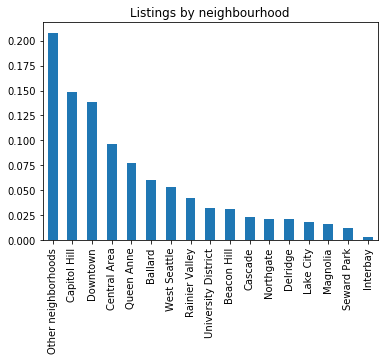

In [43]:
(n_count/df1.shape[0]).plot(kind='bar'); #'Other neighbourhoods' have most listings, followed by Capitol Hill
plt.title('Listings by neighbourhood');

In [44]:
df1[['neighbourhood_group_cleansed','has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','bathrooms','bedrooms','property_type','room_type',]]

,neighbourhood_group_cleansed,has_availability,availability_30,availability_60,availability_90,availability_365,bathrooms,bedrooms,property_type,room_type
0,Queen Anne,t,14,41,71,346,1.0,1.0,Apartment,Entire home/apt
1,Queen Anne,t,13,13,16,291,1.0,1.0,Apartment,Entire home/apt
2,Queen Anne,t,1,6,17,220,4.5,5.0,House,Entire home/apt
3,Queen Anne,t,0,0,0,143,1.0,0.0,Apartment,Entire home/apt
4,Queen Anne,t,30,60,90,365,2.0,3.0,House,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
3813,Other neighborhoods,t,18,32,32,32,2.0,3.0,House,Entire home/apt
3814,Capitol Hill,t,6,26,44,273,1.0,1.0,Apartment,Entire home/apt
3815,Rainier Valley,t,29,59,88,88,1.0,1.0,House,Entire home/apt
3816,Capitol Hill,t,30,60,90,179,1.0,0.0,Condominium,Entire home/apt


In [45]:
av_count = df1['availability_365'].median() #whats the median availability like in a year?
av_count

308.0

In [46]:
df2 = df1.groupby(['neighbourhood_group_cleansed',  #checking availability by neighbourhood
       'availability_365'],as_index=False)['id'].count()

In [47]:
neigh = pd.Series(df2['neighbourhood_group_cleansed'].value_counts())
neigh

Other neighborhoods    255
Downtown               223
Capitol Hill           212
Central Area           169
Queen Anne             160
Ballard                121
West Seattle           111
Rainier Valley          91
Beacon Hill             79
University District     63
Cascade                 63
Northgate               47
Delridge                47
Lake City               41
Magnolia                36
Seward Park             30
Interbay                 6
Name: neighbourhood_group_cleansed, dtype: int64

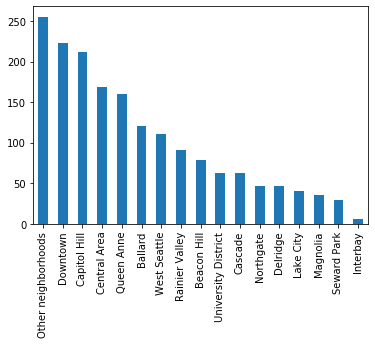

In [49]:
neigh.plot(kind='bar'); #so, Other neighborhoods do have as much availability as listings

In [50]:
plt.savefig('availability.jpg');

<Figure size 432x288 with 0 Axes>

In [51]:
df3 = df1[['neighbourhood_group_cleansed','availability_365','bathrooms','bedrooms',
     'property_type','room_type','beds', 'bed_type', 'square_feet',
       'price', 'weekly_price', 'monthly_price',]]
df3.head()

,neighbourhood_group_cleansed,availability_365,bathrooms,bedrooms,property_type,room_type,beds,bed_type,square_feet,price,weekly_price,monthly_price
0,Queen Anne,346,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,$85.00,NaN,NaN
1,Queen Anne,291,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,$150.00,"$1,000.00","$3,000.00"
2,Queen Anne,220,4.5,5.0,House,Entire home/apt,7.0,Real Bed,NaN,$975.00,NaN,NaN
3,Queen Anne,143,1.0,0.0,Apartment,Entire home/apt,2.0,Real Bed,NaN,$100.00,$650.00,"$2,300.00"
4,Queen Anne,365,2.0,3.0,House,Entire home/apt,3.0,Real Bed,NaN,$450.00,NaN,NaN


In [52]:
df3['price'] = df3['price'].str.replace("[$,]", "").astype("float")
df3['weekly_price'] = df3['weekly_price'].str.replace("[$,]", "").astype("float")
df3['monthly_price'] = df3['monthly_price'].str.replace("[$,]", "").astype("float") #convert price data points to float

/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [53]:
df3.head()

,neighbourhood_group_cleansed,availability_365,bathrooms,bedrooms,property_type,room_type,beds,bed_type,square_feet,price,weekly_price,monthly_price
0,Queen Anne,346,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,85.0,NaN,NaN
1,Queen Anne,291,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,150.0,1000.0,3000.0
2,Queen Anne,220,4.5,5.0,House,Entire home/apt,7.0,Real Bed,NaN,975.0,NaN,NaN
3,Queen Anne,143,1.0,0.0,Apartment,Entire home/apt,2.0,Real Bed,NaN,100.0,650.0,2300.0
4,Queen Anne,365,2.0,3.0,House,Entire home/apt,3.0,Real Bed,NaN,450.0,NaN,NaN


In [54]:
df3.isnull().any() #checking null values again

neighbourhood_group_cleansed    False
availability_365                False
bathrooms                        True
bedrooms                         True
property_type                    True
room_type                       False
beds                             True
bed_type                        False
square_feet                      True
price                           False
weekly_price                     True
monthly_price                    True
dtype: bool

In [55]:
df3_price = df3.fillna(df3[['price','weekly_price','monthly_price']].median()) #imputing prices with median
df3_price.head()

,neighbourhood_group_cleansed,availability_365,bathrooms,bedrooms,property_type,room_type,beds,bed_type,square_feet,price,weekly_price,monthly_price
0,Queen Anne,346,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,85.0,650.0,2200.0
1,Queen Anne,291,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,NaN,150.0,1000.0,3000.0
2,Queen Anne,220,4.5,5.0,House,Entire home/apt,7.0,Real Bed,NaN,975.0,650.0,2200.0
3,Queen Anne,143,1.0,0.0,Apartment,Entire home/apt,2.0,Real Bed,NaN,100.0,650.0,2300.0
4,Queen Anne,365,2.0,3.0,House,Entire home/apt,3.0,Real Bed,NaN,450.0,650.0,2200.0


In [56]:
df3_price.isnull().any()

neighbourhood_group_cleansed    False
availability_365                False
bathrooms                        True
bedrooms                         True
property_type                    True
room_type                       False
beds                             True
bed_type                        False
square_feet                      True
price                           False
weekly_price                    False
monthly_price                   False
dtype: bool

In [57]:
df3_a = df3_price.groupby(['neighbourhood_group_cleansed',  
       'price','property_type'],as_index=False).count()

In [58]:
df3_a

,neighbourhood_group_cleansed,price,property_type,availability_365,bathrooms,bedrooms,room_type,beds,bed_type,square_feet,weekly_price,monthly_price
0,Ballard,25.0,House,1,1,1,1,1,1,0,1,1
1,Ballard,35.0,House,2,2,2,2,2,2,0,2,2
2,Ballard,38.0,Apartment,1,1,1,1,1,1,0,1,1
3,Ballard,40.0,House,1,1,1,1,1,1,0,1,1
4,Ballard,45.0,House,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1754,West Seattle,375.0,House,1,1,1,1,1,1,0,1,1
1755,West Seattle,399.0,House,1,1,1,1,1,1,0,1,1
1756,West Seattle,450.0,House,1,1,1,1,1,1,0,1,1
1757,West Seattle,495.0,Condominium,1,1,1,1,1,1,0,1,1


In [60]:
df3_b = df3_a.groupby(['property_type'])['price'].median() #whats the median prices of properties?
df3_b.head()

property_type
Apartment          109.0
Bed & Breakfast     99.0
Boat               150.0
Bungalow            97.0
Cabin               95.0
Name: price, dtype: float64

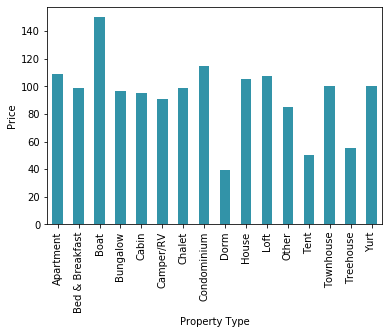

In [67]:
df3_b.plot(kind='bar',color ='#3293a8');
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.savefig('property_prices.jpg') #Boats seem to be the priciest

In [116]:
df3_price.head()  #dropped the square feet column in an earlier code but mix up happened

,neighbourhood_group_cleansed,availability_365,bathrooms,bedrooms,property_type,room_type,beds,bed_type,price,weekly_price,monthly_price
0,Queen Anne,346,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,85.0,650.0,2200.0
1,Queen Anne,291,1.0,1.0,Apartment,Entire home/apt,1.0,Real Bed,150.0,1000.0,3000.0
2,Queen Anne,220,4.5,5.0,House,Entire home/apt,7.0,Real Bed,975.0,650.0,2200.0
3,Queen Anne,143,1.0,0.0,Apartment,Entire home/apt,2.0,Real Bed,100.0,650.0,2300.0
4,Queen Anne,365,2.0,3.0,House,Entire home/apt,3.0,Real Bed,450.0,650.0,2200.0


In [117]:
df3_price.to_csv('clean_combine.csv')

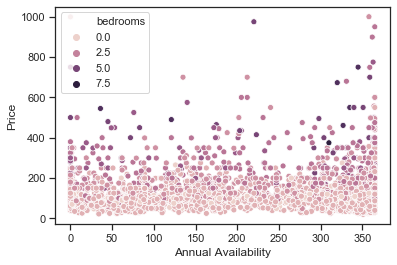

In [139]:
sns.scatterplot(df3_price['availability_365'],df3_price['price'],
                color="#2ecc71",hue=df3_price['bedrooms']) #yeah well, there are properties with zero bedrooms
plt.xlabel('Annual Availability')
plt.ylabel('Price');

In [157]:
prop = df3_price[['property_type','price']]
prop

,property_type,price
0,Apartment,85.0
1,Apartment,150.0
2,House,975.0
3,Apartment,100.0
4,House,450.0
...,...,...
3813,House,359.0
3814,Apartment,79.0
3815,House,93.0
3816,Condominium,99.0


In [160]:
prop['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [154]:
aprt = prop.loc[prop['property_type']=='Apartment']
aprt

,property_type,price
0,Apartment,85.0
1,Apartment,150.0
3,Apartment,100.0
8,Apartment,90.0
9,Apartment,150.0
...,...,...
3809,Apartment,120.0
3811,Apartment,65.0
3812,Apartment,95.0
3814,Apartment,79.0


In [156]:
aprt.to_csv('apartments.csv')

In [161]:
house = prop.loc[prop['property_type']=='House']
house

,property_type,price
2,House,975.0
4,House,450.0
5,House,120.0
6,House,80.0
10,House,95.0
...,...,...
3806,House,160.0
3808,House,175.0
3810,House,154.0
3813,House,359.0


In [162]:
house.to_csv('house.csv')

In [170]:
prop.fillna(prop['price']).median()

price    100.0
dtype: float64

In [171]:
prop.isnull().any()

property_type     True
price            False
dtype: bool

In [172]:
prop.dropna(subset=['property_type'])

,property_type,price
0,Apartment,85.0
1,Apartment,150.0
2,House,975.0
3,Apartment,100.0
4,House,450.0
...,...,...
3813,House,359.0
3814,Apartment,79.0
3815,House,93.0
3816,Condominium,99.0


In [173]:
prop.isnull().any()

property_type     True
price            False
dtype: bool

In [178]:
ap_price = aprt['price'].value_counts()
ap_price

100.0    91
150.0    84
95.0     63
110.0    60
90.0     57
         ..
232.0     1
425.0     1
295.0     1
365.0     1
999.0     1
Name: price, Length: 196, dtype: int64

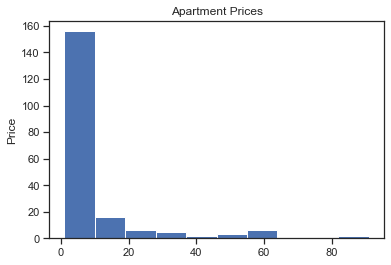

In [182]:
plt.hist(ap_price,bins=10)
plt.ylabel('Price')
plt.title('Apartment Prices'); #most apartment prices are in the USD 150 range